In [280]:
import requests
import pandas as pd
import json
from pandas import json_normalize

In [281]:
url = 'https://ll.thespacedevs.com/2.2.0/launch/previous/?status=3&year=2020,2021,2022,2023,2019,2018,2017,2016,2015,2014,2013&mode=normal&limit=100'  # Replace with your API endpoint
launch_data = []
while url:
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        launch_data.extend(data['results'])
        url = data['next']  # Update URL for next page
    else:
        print('Failed to fetch data')
        break

# Creating a DataFrame from all the retrieved launch data
df = pd.DataFrame(launch_data)

In [282]:
pd.set_option('display.max_columns', None)
df

,id,url,slug,name,status,last_updated,net,window_end,window_start,net_precision,probability,weather_concerns,holdreason,failreason,hashtag,launch_service_provider,rocket,mission,pad,webcast_live,image,infographic,program,orbital_launch_attempt_count,location_launch_attempt_count,pad_launch_attempt_count,agency_launch_attempt_count,orbital_launch_attempt_count_year,location_launch_attempt_count_year,pad_launch_attempt_count_year,agency_launch_attempt_count_year,type
0,0a399298-8e59-4ad3-80bd-3e211dff7596,https://ll.thespacedevs.com/2.2.0/launch/0a399...,hyperbola-1-dear-1,Hyperbola-1 | DEAR-1,"{'id': 3, 'name': 'Launch Successful', 'abbrev...",2023-12-17T09:52:23Z,2023-12-17T07:00:00Z,2023-12-17T08:27:00Z,2023-12-17T06:53:00Z,"{'id': 1, 'name': 'Minute', 'abbrev': 'MIN', '...",NaN,None,,,None,"{'id': 274, 'url': 'https://ll.thespacedevs.co...","{'id': 8145, 'configuration': {'id': 193, 'url...","{'id': 6704, 'name': 'DEAR-1', 'description': ...","{'id': 21, 'url': 'https://ll.thespacedevs.com...",False,https://spacelaunchnow-prod-east.nyc3.digitalo...,None,[],6564.0,215,47,6,207,33,12,2,normal
1,d524b397-7670-4183-b807-03a4c0d705de,https://ll.thespacedevs.com/2.2.0/launch/d524b...,soyuz-21bfregat-m-arktika-m-no2,Soyuz 2.1b/Fregat-M | Arktika-M No.2,"{'id': 3, 'name': 'Launch Successful', 'abbrev...",2023-12-17T08:51:07Z,2023-12-16T09:17:48Z,2023-12-16T09:17:48Z,2023-12-16T09:17:48Z,"{'id': 0, 'name': 'Second', 'abbrev': 'SEC', '...",NaN,None,,,None,"{'id': 63, 'url': 'https://ll.thespacedevs.com...","{'id': 8003, 'configuration': {'id': 134, 'url...","{'id': 6538, 'name': 'Arktika-M No.2', 'descri...","{'id': 20, 'url': 'https://ll.thespacedevs.com...",False,https://spacelaunchnow-prod-east.nyc3.digitalo...,None,[],6563.0,1545,412,318,206,9,7,10,normal
2,ebefa135-366c-4a21-afdf-af4d18ea360b,https://ll.thespacedevs.com/2.2.0/launch/ebefa...,long-march-5-yaogan-41,Long March 5 | Yaogan 41,"{'id': 3, 'name': 'Launch Successful', 'abbrev...",2023-12-16T08:56:49Z,2023-12-15T13:41:00Z,2023-12-15T14:26:00Z,2023-12-15T13:32:00Z,"{'id': 1, 'name': 'Minute', 'abbrev': 'MIN', '...",NaN,None,,,None,"{'id': 88, 'url': 'https://ll.thespacedevs.com...","{'id': 7798, 'configuration': {'id': 128, 'url...","{'id': 6702, 'name': 'Yaogan 41', 'description...","{'id': 175, 'url': 'https://ll.thespacedevs.co...",False,https://spacelaunchnow-prod-east.nyc3.digitalo...,None,[],6562.0,25,10,451,205,4,1,45,normal
3,2918b5f6-1340-4c73-bb75-4f9b5e16999f,https://ll.thespacedevs.com/2.2.0/launch/2918b...,electron-the-moon-god-awakens-qps-sar-5,Electron | The Moon God Awakens (QPS-SAR-5),"{'id': 3, 'name': 'Launch Successful', 'abbrev...",2023-12-16T12:43:37Z,2023-12-15T04:05:00Z,2023-12-15T06:00:00Z,2023-12-15T04:00:00Z,"{'id': 1, 'name': 'Minute', 'abbrev': 'MIN', '...",NaN,None,,,None,"{'id': 147, 'url': 'https://ll.thespacedevs.co...","{'id': 7990, 'configuration': {'id': 26, 'url'...","{'id': 6516, 'name': 'The Moon God Awakens (QP...","{'id': 185, 'url': 'https://ll.thespacedevs.co...",False,https://spacelaunchnow-prod-east.nyc3.digitalo...,None,[],6561.0,39,13,42,204,7,7,10,normal
4,ea4825db-6866-40dd-932d-bacdb1c705ab,https://ll.thespacedevs.com/2.2.0/launch/ea482...,long-march-2fg-chinese-reusable-space-vehicle-3,Long March 2F/G | Chinese Reusable Space Vehicle,"{'id': 3, 'name': 'Launch Successful', 'abbrev...",2023-12-15T01:46:02Z,2023-12-14T14:12:00Z,2023-12-14T17:10:00Z,2023-12-14T14:01:00Z,"{'id': 1, 'name': 'Minute', 'abbrev': 'MIN', '...",NaN,None,,,None,"{'id': 88, 'url': 'https://ll.thespacedevs.com...","{'id': 8144, 'configuration': {'id': 84, 'url'...","{'id': 6703, 'name': 'Chinese Reusable Space V...","{'id': 37, 'url': 'https://ll.thespacedevs.com...",False,https://spacelaunchnow-prod-east.nyc3.digitalo...,None,[],6560.0,214,22,450,203,32,3,44,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,336ea74b-3076-40a1-825a-e72d070ad430,https://ll.the

In [283]:
# Extracting 'name' and 'type' from dictionaries in the column
df['lsp_name'] = df['launch_service_provider'].apply(lambda x: x['name'])
df['lsp_type'] = df['launch_service_provider'].apply(lambda x: x['type'])

df.drop('launch_service_provider', axis=1, inplace=True)


In [284]:
# Extract 'orbit' abbreviation using json_normalize
df['orbit'] = json_normalize(df['mission'], sep='_')['orbit_abbrev']

df.drop('mission', axis=1, inplace=True)

In [285]:
# Extract latitude and longitude into new columns
df[['Latitude', 'Longitude']] = json_normalize(df['pad'])[['latitude', 'longitude']]

# Convert the datatype of Latitude and Longitude columns if needed
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])

df['pad_name'] = df['pad'].apply(lambda x: x['name'])
df['location'] = df['pad'].apply(lambda x: x['location']['name'])


df.drop('pad', axis=1, inplace=True)


In [286]:
df

,id,url,slug,name,status,last_updated,net,window_end,window_start,net_precision,probability,weather_concerns,holdreason,failreason,hashtag,rocket,webcast_live,image,infographic,program,orbital_launch_attempt_count,location_launch_attempt_count,pad_launch_attempt_count,agency_launch_attempt_count,orbital_launch_attempt_count_year,location_launch_attempt_count_year,pad_launch_attempt_count_year,agency_launch_attempt_count_year,type,lsp_name,lsp_type,orbit,Latitude,Longitude,pad_name,location
0,0a399298-8e59-4ad3-80bd-3e211dff7596,https://ll.thespacedevs.com/2.2.0/launch/0a399...,hyperbola-1-dear-1,Hyperbola-1 | DEAR-1,"{'id': 3, 'name': 'Launch Successful', 'abbrev...",2023-12-17T09:52:23Z,2023-12-17T07:00:00Z,2023-12-17T08:27:00Z,2023-12-17T06:53:00Z,"{'id': 1, 'name': 'Minute', 'abbrev': 'MIN', '...",NaN,None,,,None,"{'id': 8145, 'configuration': {'id': 193, 'url...",False,https://spacelaunchnow-prod-east.nyc3.digitalo...,None,[],6564.0,215,47,6,207,33,12,2,normal,iSpace,Commercial,SSO,40.969117,100.343333,Launch Area 95A,"Jiuquan Satellite Launch Center, People's Repu..."
1,d524b397-7670-4183-b807-03a4c0d705de,https://ll.thespacedevs.com/2.2.0/launch/d524b...,soyuz-21bfregat-m-arktika-m-no2,Soyuz 2.1b/Fregat-M | Arktika-M No.2,"{'id': 3, 'name': 'Launch Successful', 'abbrev...",2023-12-17T08:51:07Z,2023-12-16T09:17:48Z,2023-12-16T09:17:48Z,2023-12-16T09:17:48Z,"{'id': 0, 'name': 'Second', 'abbrev': 'SEC', '...",NaN,None,,,None,"{'id': 8003, 'configuration': {'id': 134, 'url...",False,https://spacelaunchnow-prod-east.nyc3.digitalo...,None,[],6563.0,1545,412,318,206,9,7,10,normal,Russian Federal Space Agency (ROSCOSMOS),Government,Elliptical,45.996034,63.564003,31/6,"Baikonur Cosmodrome, Republic of Kazakhstan"
2,ebefa135-366c-4a21-afdf-af4d18ea360b,https://ll.thespacedevs.com/2.2.0/launch/ebefa...,long-march-5-yaogan-41,Long March 5 | Yaogan 41,"{'id': 3, 'name': 'Launch Successful', 'abbrev...",2023-12-16T08:56:49Z,2023-12-15T13:41:00Z,2023-12-15T14:26:00Z,2023-12-15T13:32:00Z,"{'id': 1, 'name': 'Minute', 'abbrev': 'MIN', '...",NaN,None,,,None,"{'id': 7798, 'configuration': {'id': 128, 'url...",False,https://spacelaunchnow-prod-east.nyc3.digitalo...,None,[],6562.0,25,10,451,205,4,1,45,normal,China Aerospace Science and Technology Corpora...,Government,GTO,19.614334,110.951011,101,"Wenchang Space Launch Site, People's Republic ..."
3,2918b5f6-1340-4c73-bb75-4f9b5e16999f,https://ll.thespacedevs.com/2.2.0/launch/2918b...,electron-the-moon-god-awakens-qps-sar-5,Electron | The Moon God Awakens (QPS-SAR-5),"{'id': 3, 'name': 'Launch Successful', 'abbrev...",2023-12-16T12:43:37Z,2023-12-15T04:05:00Z,2023-12-15T06:00:00Z,2023-12-15T04:00:00Z,"{'id': 1, 'name': 'Minute', 'abbrev': 'MIN', '...",NaN,None,,,None,"{'id': 7990, 'configuration': {'id': 26, 'url'...",False,https://spacelaunchnow-prod-east.nyc3.digitalo...,None,[],6561.0,39,13,42,204,7,7,10,normal,Rocket Lab,Commercial,LEO,-39.262833,177.864469,Rocket Lab Launch Complex 1B,"Onenui Station, Mahia Peninsula, New Zealand"
4,ea4825db-6866-40dd-932d-bacdb1c705ab,https://ll.thespacedevs.com/2.2.0/launch/ea482...,long-march-2fg-chinese-reusable-space-vehicle-3,Long March 2F/G | Chinese Reusable Space Vehicle,"{'id': 3, 'name': 'Launch Successful', 'abbrev...",2023-12-15T01:46:02Z,2023-12-14T14:12:00Z,2023-12-14T17:10:00Z,2023-12-14T14:01:00Z,"{'id': 1, 'name': 'Minute', 'abbrev': 'MIN', '...",NaN,None,,,None,"{'id': 8144, 'configuration': {'id': 84, 'url'...",False,https://spacelaunchnow-prod-east.nyc3.digitalo...,None,[],6560.0,214,22,450,203,32,3,44,normal,China Aerospace Science and Technology Corpora...,Government,LEO,40.957893,100.290944,Launch Area 4 (SLS-1 / 921),"Jiuquan Satellite Launch Center, People's Repu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,336ea74b-3076-40a1-825a-e72d070ad430,https://ll.thespacedevs.com/2.2.0/launch/336ea...,ariane-5-eca-azerspace-1af

In [287]:
# List of columns you want to remove
columns_to_remove = ["id", "url", "slug", "status", "last_updated", "net", "net_precision", "window_end", "probability", "weather_concerns", "holdreason", "failreason", "hashtag", "webcast_live", "infographic", "program", "type", "rocket", "orbital_launch_attempt_count", "orbital_launch_attempt_count_year"]

In [288]:
# Removing the specified columns
df = df.drop(columns=columns_to_remove)

In [289]:
df = df.rename(columns={'window_start': 'date'})


In [290]:
# Convert string to datetime format
df['date'] = pd.to_datetime(df['date'])

# Convert the datetime to the desired format: 'YYYY-MM-DD'
df['date'] = df['date'].dt.strftime('%Y-%m-%d')


In [291]:
desired_order = [
    'name', 'date', 'lsp_name', 'lsp_type', 'orbit', 'location', 'pad_name', 'Latitude', 'Longitude',
    'location_launch_attempt_count', 'pad_launch_attempt_count', 'agency_launch_attempt_count',
    'location_launch_attempt_count_year', 'pad_launch_attempt_count_year',
    'agency_launch_attempt_count_year'
]

# Replace df with your DataFrame variable name
df = df[desired_order]

In [292]:
df

,name,date,lsp_name,lsp_type,orbit,location,pad_name,Latitude,Longitude,location_launch_attempt_count,pad_launch_attempt_count,agency_launch_attempt_count,location_launch_attempt_count_year,pad_launch_attempt_count_year,agency_launch_attempt_count_year
0,Hyperbola-1 | DEAR-1,2023-12-17,iSpace,Commercial,SSO,"Jiuquan Satellite Launch Center, People's Repu...",Launch Area 95A,40.969117,100.343333,215,47,6,33,12,2
1,Soyuz 2.1b/Fregat-M | Arktika-M No.2,2023-12-16,Russian Federal Space Agency (ROSCOSMOS),Government,Elliptical,"Baikonur Cosmodrome, Republic of Kazakhstan",31/6,45.996034,63.564003,1545,412,318,9,7,10
2,Long March 5 | Yaogan 41,2023-12-15,China Aerospace Science and Technology Corpora...,Government,GTO,"Wenchang Space Launch Site, People's Republic ...",101,19.614334,110.951011,25,10,451,4,1,45
3,Electron | The Moon God Awakens (QPS-SAR-5),2023-12-15,Rocket Lab,Commercial,LEO,"Onenui Station, Mahia Peninsula, New Zealand",Rocket Lab Launch Complex 1B,-39.262833,177.864469,39,13,42,7,7,10
4,Long March 2F/G | Chinese Reusable Space Vehicle,2023-12-14,China Aerospace Science and Technology Corpora...,Government,LEO,"Jiuquan Satellite Launch Center, People's Repu...",Launch Area 4 (SLS-1 / 921),40.957893,100.290944,214,22,450,32,3,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,Ariane 5 ECA | Azerspace-1/Africasat-1a & Amaz...,2013-02-07,Arianespace,Commercial,GTO,"Kourou, French Guiana",Ariane Launch Area 3,5.239000,-52.768000,226,68,211,1,1,1
1310,Soyuz-2.1a/Fregat | 6 x Globalstar-2,2013-02-06,Starsem SA,Commercial,LEO,"Baikonur Cosmodrome, Republic of Kazakhstan",31/6,45.996034,63.564003,1401,355,5,1,1,1
1311,Atlas V 401 | TDRS-K,2013-01-31,United Launch Alliance,Commercial,GTO,"Cape Canaveral, FL, USA",Space Launch Complex 41,28.583410,-80.583036,694,57,68,1,1,1
1312,Naro-1 | STSAT-2C,2013-01-30,Korea Aerospace Research Institute,Government,NaN,"Naro Space Center, South Korea",LC-1,34.431867,127.535069,3,3,3,1,1,1


In [293]:
url = 'https://ll.thespacedevs.com/2.2.0/launch/previous/?status=3&year=2020,2021,2022,2023,2019,2018,2017,2016,2015,2014,2013&mode=list&limit=100'  # Replace with your API endpoint
launch_data = []
while url:
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        launch_data.extend(data['results'])
        url = data['next']  # Update URL for next page
    else:
        print('Failed to fetch data')
        break

# Creating a DataFrame from all the retrieved launch data
list_df = pd.DataFrame(launch_data)

In [294]:
rocket_df = df.merge(list_df[['landing', 'mission_type']], left_index=True, right_index=True)

In [295]:
rocket_df

,name,date,lsp_name,lsp_type,orbit,location,pad_name,Latitude,Longitude,location_launch_attempt_count,pad_launch_attempt_count,agency_launch_attempt_count,location_launch_attempt_count_year,pad_launch_attempt_count_year,agency_launch_attempt_count_year,landing,mission_type
0,Hyperbola-1 | DEAR-1,2023-12-17,iSpace,Commercial,SSO,"Jiuquan Satellite Launch Center, People's Repu...",Launch Area 95A,40.969117,100.343333,215,47,6,33,12,2,None,Technology
1,Soyuz 2.1b/Fregat-M | Arktika-M No.2,2023-12-16,Russian Federal Space Agency (ROSCOSMOS),Government,Elliptical,"Baikonur Cosmodrome, Republic of Kazakhstan",31/6,45.996034,63.564003,1545,412,318,9,7,10,None,Earth Science
2,Long March 5 | Yaogan 41,2023-12-15,China Aerospace Science and Technology Corpora...,Government,GTO,"Wenchang Space Launch Site, People's Republic ...",101,19.614334,110.951011,25,10,451,4,1,45,None,Government/Top Secret
3,Electron | The Moon God Awakens (QPS-SAR-5),2023-12-15,Rocket Lab,Commercial,LEO,"Onenui Station, Mahia Peninsula, New Zealand",Rocket Lab Launch Complex 1B,-39.262833,177.864469,39,13,42,7,7,10,PAC,Earth Science
4,Long March 2F/G | Chinese Reusable Space Vehicle,2023-12-14,China Aerospace Science and Technology Corpora...,Government,LEO,"Jiuquan Satellite Launch Center, People's Repu...",Launch Area 4 (SLS-1 / 921),40.957893,100.290944,214,22,450,32,3,44,None,Government/Top Secret
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,Ariane 5 ECA | Azerspace-1/Africasat-1a & Amaz...,2013-02-07,Arianespace,Commercial,GTO,"Kourou, French Guiana",Ariane Launch Area 3,5.239000,-52.768000,226,68,211,1,1,1,None,Communications
1310,Soyuz-2.1a/Fregat | 6 x Globalstar-2,2013-02-06,Starsem SA,Commercial,LEO,"Baikonur Cosmodrome, Republic of Kazakhstan",31/6,45.996034,63.564003,1401,355,5,1,1,1,None,Communications
1311,Atlas V 401 | TDRS-K,2013-01-31,United Launch Alliance,Commercial,GTO,"Cape Canaveral, FL, USA",Space Launch Complex 41,28.583410,-80.583036,694,57,68,1,1,1,None,Communications
1312,Naro-1 | STSAT-2C,2013-01-30,Korea Aerospace Research Institute,Government,NaN,"Naro Space Center, South Korea",LC-1,34.431867,127.535069,3,3,3,1,1,1,None,None


In [296]:
rocket_df.to_csv('launch_data.csv', index=False)

In [297]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = rocket_df

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract year from the 'date' column
df['year'] = df['date'].dt.year

In [298]:
df

,name,date,lsp_name,lsp_type,orbit,location,pad_name,Latitude,Longitude,location_launch_attempt_count,pad_launch_attempt_count,agency_launch_attempt_count,location_launch_attempt_count_year,pad_launch_attempt_count_year,agency_launch_attempt_count_year,landing,mission_type,year
0,Hyperbola-1 | DEAR-1,2023-12-17,iSpace,Commercial,SSO,"Jiuquan Satellite Launch Center, People's Repu...",Launch Area 95A,40.969117,100.343333,215,47,6,33,12,2,None,Technology,2023
1,Soyuz 2.1b/Fregat-M | Arktika-M No.2,2023-12-16,Russian Federal Space Agency (ROSCOSMOS),Government,Elliptical,"Baikonur Cosmodrome, Republic of Kazakhstan",31/6,45.996034,63.564003,1545,412,318,9,7,10,None,Earth Science,2023
2,Long March 5 | Yaogan 41,2023-12-15,China Aerospace Science and Technology Corpora...,Government,GTO,"Wenchang Space Launch Site, People's Republic ...",101,19.614334,110.951011,25,10,451,4,1,45,None,Government/Top Secret,2023
3,Electron | The Moon God Awakens (QPS-SAR-5),2023-12-15,Rocket Lab,Commercial,LEO,"Onenui Station, Mahia Peninsula, New Zealand",Rocket Lab Launch Complex 1B,-39.262833,177.864469,39,13,42,7,7,10,PAC,Earth Science,2023
4,Long March 2F/G | Chinese Reusable Space Vehicle,2023-12-14,China Aerospace Science and Technology Corpora...,Government,LEO,"Jiuquan Satellite Launch Center, People's Repu...",Launch Area 4 (SLS-1 / 921),40.957893,100.290944,214,22,450,32,3,44,None,Government/Top Secret,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,Ariane 5 ECA | Azerspace-1/Africasat-1a & Amaz...,2013-02-07,Arianespace,Commercial,GTO,"Kourou, French Guiana",Ariane Launch Area 3,5.239000,-52.768000,226,68,211,1,1,1,None,Communications,2013
1310,Soyuz-2.1a/Fregat | 6 x Globalstar-2,2013-02-06,Starsem SA,Commercial,LEO,"Baikonur Cosmodrome, Republic of Kazakhstan",31/6,45.996034,63.564003,1401,355,5,1,1,1,None,Communications,2013
1311,Atlas V 401 | TDRS-K,2013-01-31,United Launch Alliance,Commercial,GTO,"Cape Canaveral, FL, USA",Space Launch Complex 41,28.583410,-80.583036,694,57,68,1,1,1,None,Communications,2013
1312,Naro-1 | STSAT-2C,2013-01-30,Korea Aerospace Research Institute,Government,NaN,"Naro Space Center, South Korea",LC-1,34.431867,127.535069,3,3,3,1,1,1,None,None,2013


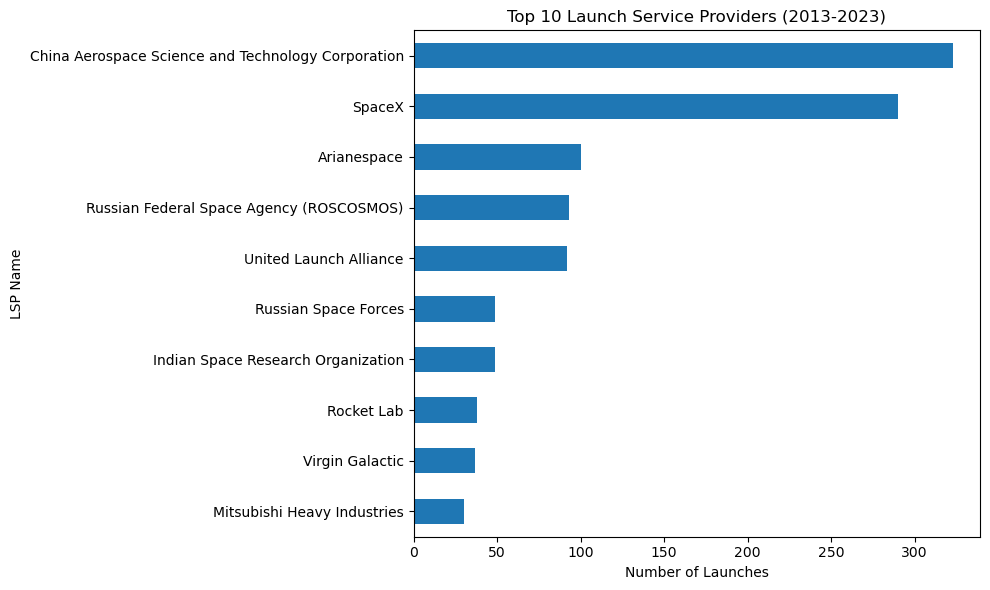

In [299]:
# Use df['lsp_name'].value_counts() to get the counts
lsp_counts = df['lsp_name'].value_counts().head(10)  # Extract top 10 counts
lsp_counts = lsp_counts.sort_values(ascending=True)  # Sort values in descending order

plt.figure(figsize=(10, 6))
bars = lsp_counts.plot(kind='barh')
plt.xlabel('Number of Launches')
plt.ylabel('LSP Name')
plt.title('Top 10 Launch Service Providers (2013-2023)')
plt.yticks(rotation=90)  # Rotate y-axis labels for better readability

# Rotate the y-axis tick labels for better readability
for tick in bars.get_yticklabels():
    tick.set_rotation(0)  # 0 degrees keeps labels horizontal

plt.tight_layout()
plt.show()

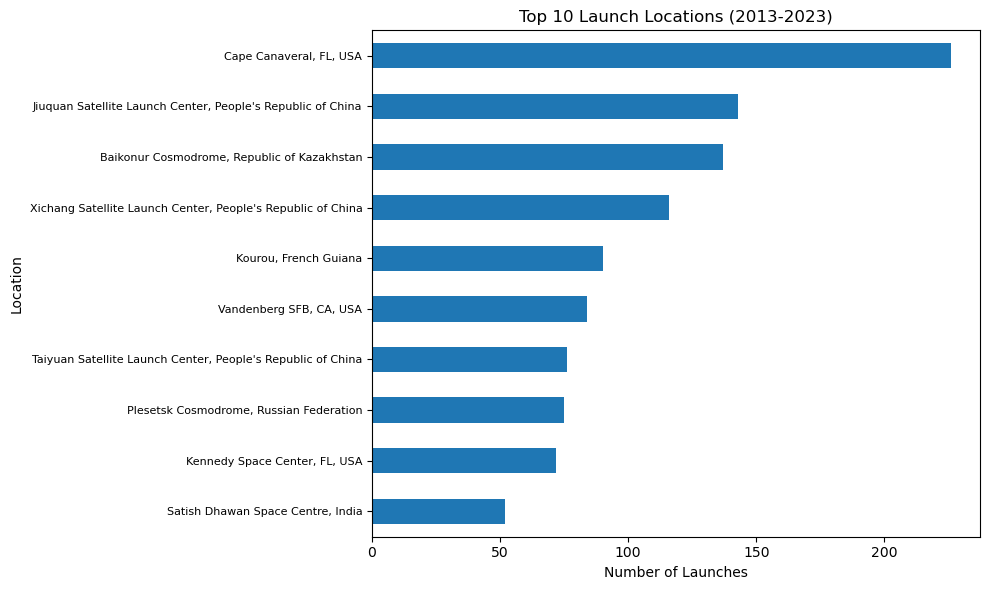

In [300]:
location_counts = df['location'].value_counts().head(10)  # Extract top 10 counts
location_counts = location_counts.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
bars = location_counts.plot(kind='barh')  # Horizontal bar chart
plt.xlabel('Number of Launches')
plt.ylabel('Location')
plt.title('Top 10 Launch Locations (2013-2023)')
plt.yticks(rotation=45)  # Rotate y-axis labels for better readability

# Rotate the y-axis tick labels and set font size
for tick in bars.get_yticklabels():
    tick.set_rotation(0)  # Keep horizontal orientation
    tick.set_fontsize(8)  # Adjust font size here

plt.tight_layout()
plt.show()

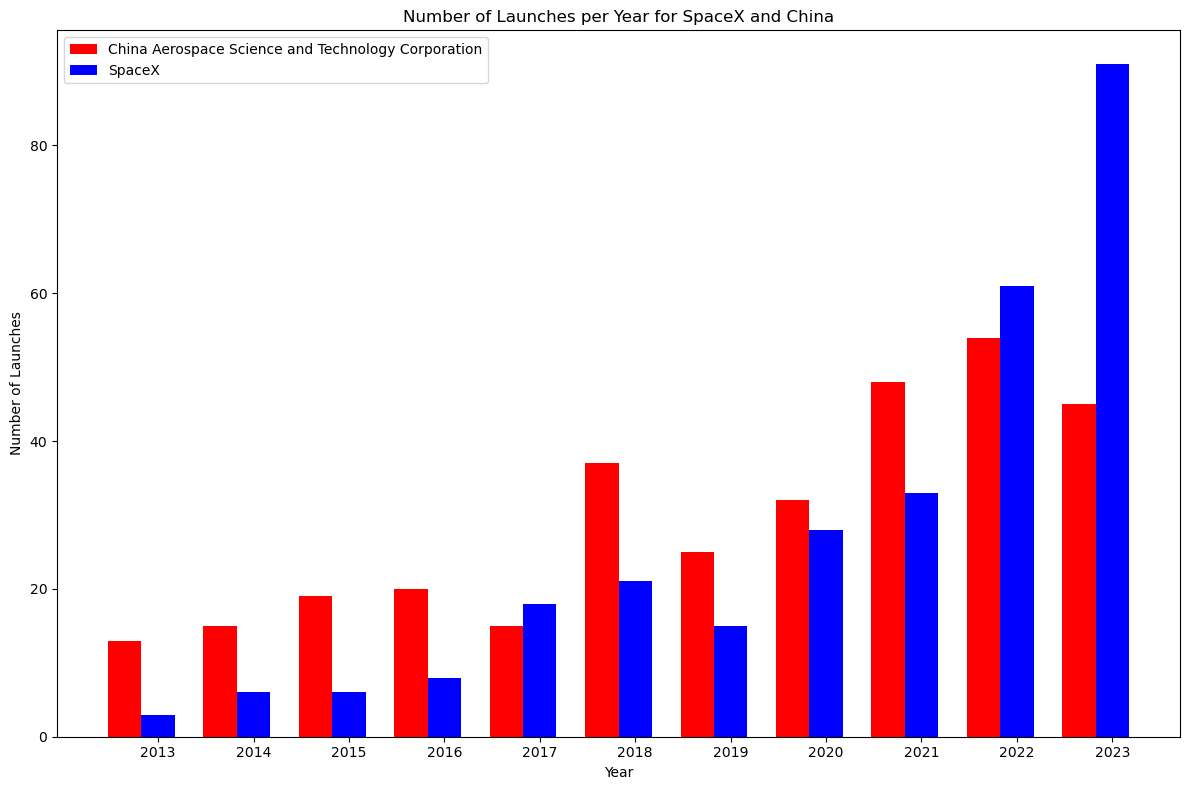

In [301]:
# Extract year from the 'date' column
df['year'] = df['date'].dt.year

# Filter data for SpaceX and China
selected_lsp = ['SpaceX', 'China Aerospace Science and Technology Corporation']
filtered_df = df[df['lsp_name'].isin(selected_lsp)]

# Grouping launches by year and lsp_name, counting the number of launches per year for each lsp_name
launches_per_year_lsp = filtered_df.groupby(['year', 'lsp_name']).size().unstack(fill_value=0)

colors = {'SpaceX': 'blue', 'China Aerospace Science and Technology Corporation': 'red'}

# Plotting a side-by-side bar chart for launches per year for SpaceX and China
plt.figure(figsize=(12, 8))

bar_width = 0.35
index = np.arange(len(launches_per_year_lsp))  # Generating an index range for the data

for i, lsp_name in enumerate(launches_per_year_lsp.columns):
    plt.bar(index + i * bar_width, launches_per_year_lsp[lsp_name], width=bar_width, label=lsp_name, color=colors[lsp_name])

plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Number of Launches per Year for SpaceX and China')
plt.xticks(index + bar_width * len(launches_per_year_lsp.columns) / 2, launches_per_year_lsp.index)  # Centering x-ticks
plt.legend()

plt.tight_layout()
plt.show()


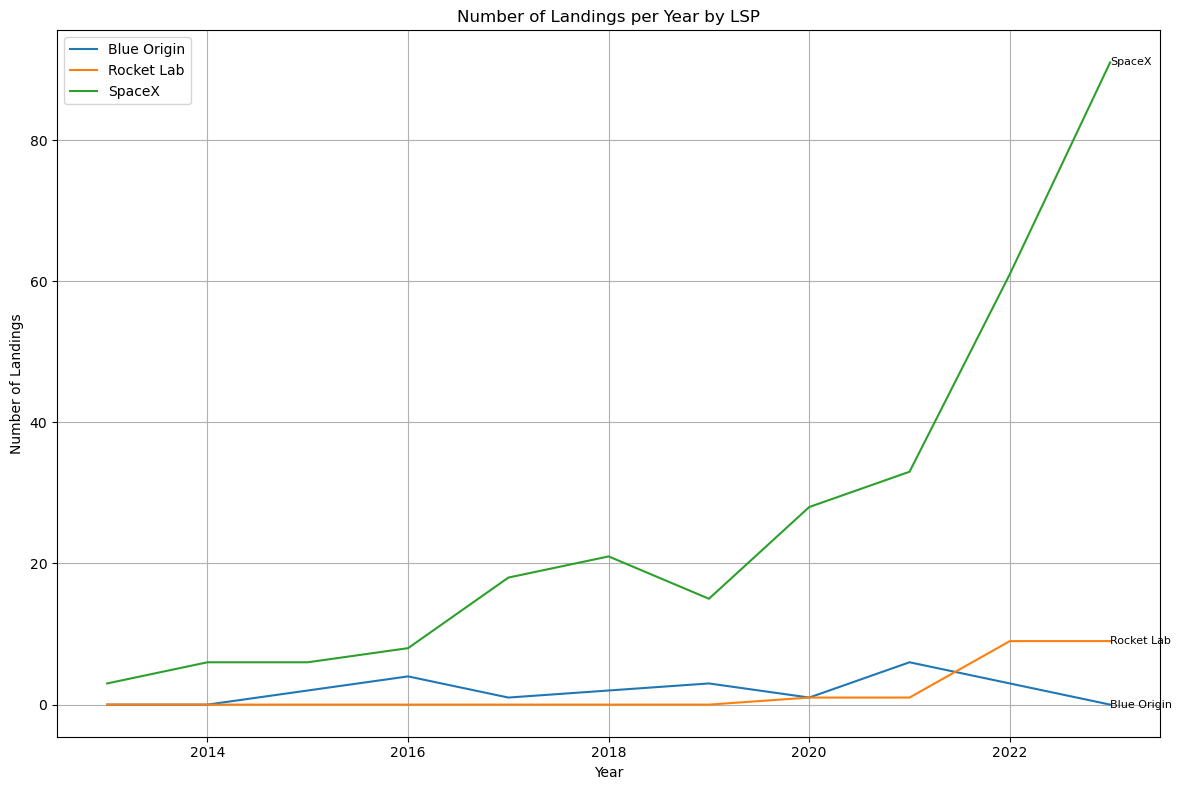

In [302]:

# Filter for rows with landing data available
landings_df = df[df['landing'].notnull()]

# Group by year and lsp_name, counting the number of landings per year for each lsp_name
landings_per_year_lsp = landings_df.groupby(['year', 'lsp_name']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))

for lsp_name in landings_per_year_lsp.columns:
    plt.plot(landings_per_year_lsp.index, landings_per_year_lsp[lsp_name], label=lsp_name)

    # Adding labels at the end of each line
    plt.text(landings_per_year_lsp.index[-1], landings_per_year_lsp[lsp_name].iloc[-1], lsp_name, fontsize=8, ha='left', va='center')

plt.xlabel('Year')
plt.ylabel('Number of Landings')
plt.title('Number of Landings per Year by LSP')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

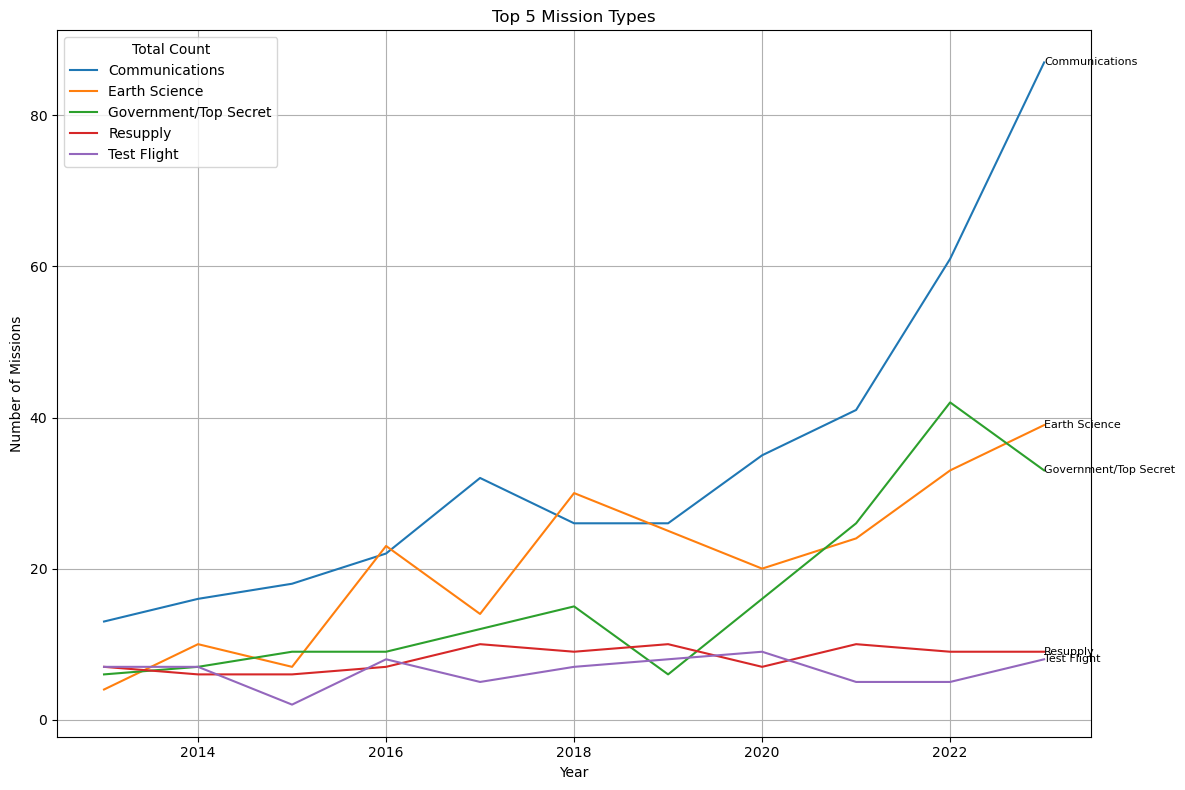

In [303]:
# Group by year and mission_type, counting the number of missions per year for each mission_type
missions_per_year_type = df.groupby(['year', 'mission_type']).size().unstack(fill_value=0)

# Get the top 5 mission types by the total count across all years
top_5_mission_types = missions_per_year_type.sum().nlargest(5).index.tolist()

# Filter the DataFrame to include only the top 5 mission types
missions_per_year_type_top5 = missions_per_year_type[top_5_mission_types]

# Plotting the count of missions per year for each of the top 5 mission types
plt.figure(figsize=(12, 8))

for mission_type in missions_per_year_type_top5.columns:
    plt.plot(missions_per_year_type_top5.index, missions_per_year_type_top5[mission_type], label=mission_type)

    # Adding labels next to each line
    plt.text(missions_per_year_type_top5.index[-1], missions_per_year_type_top5[mission_type].iloc[-1], mission_type, fontsize=8, ha='left', va='center')

plt.xlabel('Year')
plt.ylabel('Number of Missions')
plt.title('Top 5 Mission Types')
plt.legend(title='Total Count')
plt.grid(True)
plt.tight_layout()
plt.show()

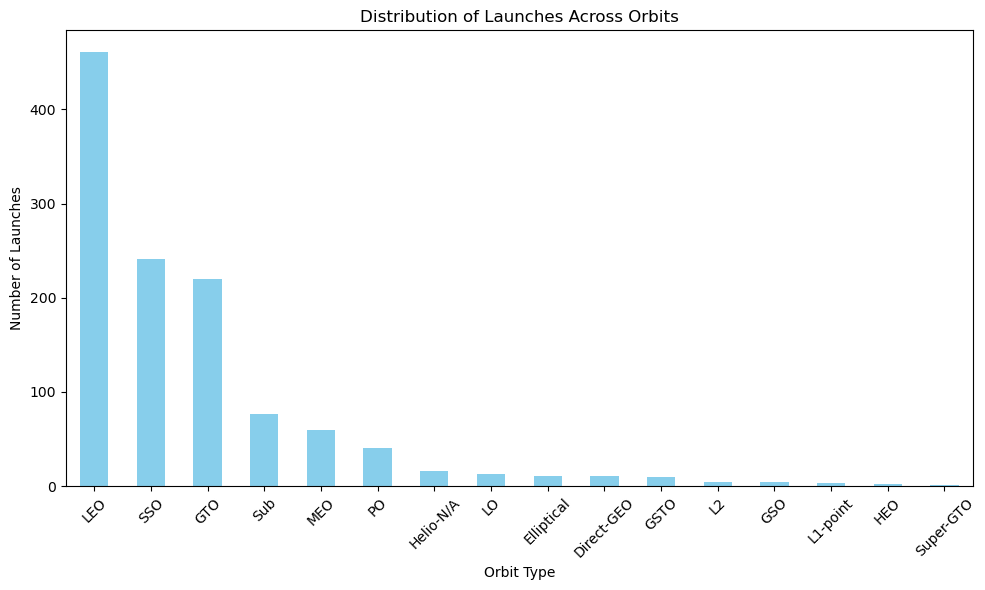

In [304]:
# Assuming the orbit information is in the 'orbit' column
orbit_counts = df['orbit'].value_counts()

plt.figure(figsize=(10, 6))
orbit_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Launches Across Orbits')
plt.xlabel('Orbit Type')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()